In [61]:
import numpy as np
import pandas as pan
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [30]:
# Read wine data
wine = pan.read_csv('wine.txt', sep="\t", header=0)
# Show data
print(wine)

    Clarity  Aroma  Body  Flavor  Oakiness  Quality  Region
0       1.0    3.3   2.8     3.1       4.1      9.8       1
1       1.0    4.4   4.9     3.5       3.9     12.6       1
2       1.0    3.9   5.3     4.8       4.7     11.9       1
3       1.0    3.9   2.6     3.1       3.6     11.1       1
4       1.0    5.6   5.1     5.5       5.1     13.3       1
5       1.0    4.6   4.7     5.0       4.1     12.8       1
6       1.0    4.8   4.8     4.8       3.3     12.8       1
7       1.0    5.3   4.5     4.3       5.2     12.0       1
8       1.0    4.3   4.3     3.9       2.9     13.6       3
9       1.0    4.3   3.9     4.7       3.9     13.9       1
10      1.0    5.1   4.3     4.5       3.6     14.4       3
11      0.5    3.3   5.4     4.3       3.6     12.3       2
12      0.8    5.9   5.7     7.0       4.1     16.1       3
13      0.7    7.7   6.6     6.7       3.7     16.1       3
14      1.0    7.1   4.4     5.8       4.1     15.5       3
15      0.9    5.5   5.6     5.6       4

In [42]:
# Gather info about wine data
wine.head()

,Clarity,Aroma,Body,Flavor,Oakiness,Quality,Region
0,1.0,3.3,2.8,3.1,4.1,9.8,1
1,1.0,4.4,4.9,3.5,3.9,12.6,1
2,1.0,3.9,5.3,4.8,4.7,11.9,1
3,1.0,3.9,2.6,3.1,3.6,11.1,1
4,1.0,5.6,5.1,5.5,5.1,13.3,1


In [43]:
wine.tail()

,Clarity,Aroma,Body,Flavor,Oakiness,Quality,Region
33,1.0,6.8,5.0,6.0,5.2,14.9,3
34,0.8,5.0,5.7,5.5,4.8,13.5,1
35,0.8,3.5,4.7,4.2,3.3,12.2,1
36,0.8,4.3,5.5,3.5,5.8,10.3,1
37,0.8,5.2,4.8,5.7,3.5,13.2,1


In [36]:
wine.describe()

,Clarity,Aroma,Body,Flavor,Oakiness,Quality,Region
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,0.923684,4.847368,4.684211,4.768421,4.255263,12.436842,1.868421
std,0.123975,1.082474,0.824138,1.028014,0.738039,2.045353,0.875216
min,0.500000,3.300000,2.600000,2.900000,2.900000,7.900000,1.000000
25%,0.825000,4.125000,4.150000,4.225000,3.700000,11.150000,1.000000
50%,1.000000,4.650000,4.750000,4.800000,4.100000,12.450000,2.000000
75%,1.000000,5.450000,5.375000,5.500000,4.775000,13.750000,3.000000
max,1.000000,7.700000,6.600000,7.000000,6.000000,16.100000,3.000000


In [46]:
wine.info()
wine.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Clarity   38 non-null     float64
 1   Aroma     38 non-null     float64
 2   Body      38 non-null     float64
 3   Flavor    38 non-null     float64
 4   Oakiness  38 non-null     float64
 5   Quality   38 non-null     float64
 6   Region    38 non-null     int64  
dtypes: float64(6), int64(1)
memory usage: 2.2 KB


(38, 7)

,Quality,Clarity
Quality,1.000000,0.028441
Clarity,0.028441,1.000000


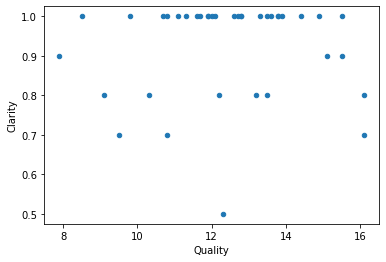

In [52]:
# Plot for Quality vs Clarity
wine.plot.scatter(x = 'Quality', y = 'Clarity')
wine[['Quality','Clarity']].corr()
# Low relevelance

,Quality,Aroma
Quality,1.000000,0.707324
Aroma,0.707324,1.000000


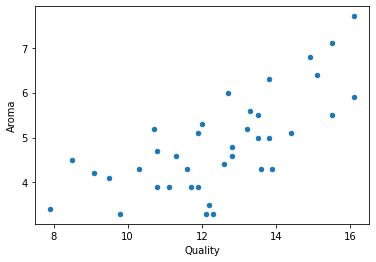

In [68]:
# Plot for Quality vs Aroma
wine.plot.scatter(x = 'Quality', y = 'Aroma')
wine[['Quality', 'Aroma']].corr()
# High relevance 

,Quality,Body
Quality,1.000000,0.548702
Body,0.548702,1.000000


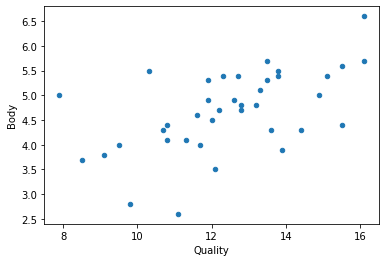

In [54]:
# Plot for Quality vs Body
wine.plot.scatter(x = 'Quality', y = 'Body')
wine[['Quality','Body']].corr()
# Medium Relevance

,Quality,Flavor
Quality,1.000000,0.790047
Flavor,0.790047,1.000000


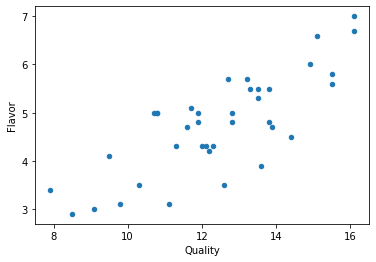

In [55]:
# Plot for Quality vs Flavor
wine.plot.scatter(x = 'Quality', y = 'Flavor')
wine[['Quality','Flavor']].corr()

,Quality,Oakiness
Quality,1.00000,-0.04704
Oakiness,-0.04704,1.00000


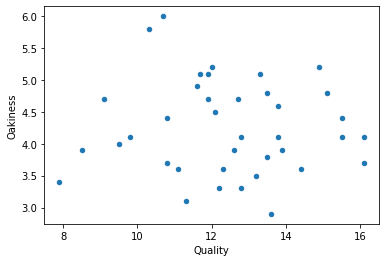

In [56]:
# Plot for Quality vs Oakiness
wine.plot.scatter(x = 'Quality', y = 'Oakiness')
wine[['Quality','Oakiness']].corr()
# High relevance

,Quality,Region
Quality,1.000000,0.507049
Region,0.507049,1.000000


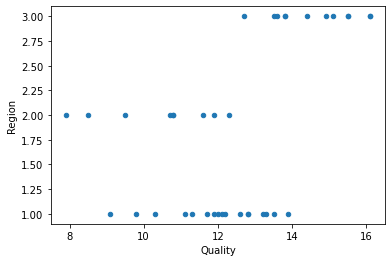

In [57]:
# Plot for Quality vs Region
wine.plot.scatter(x = 'Quality', y = 'Region')
wine[['Quality','Region']].corr()
# Low relevance

                            OLS Regression Results                            
Dep. Variable:                Clarity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                   0.02914
Date:                Mon, 20 Feb 2023   Prob (F-statistic):              0.865
Time:                        14:46:24   Log-Likelihood:                 25.934
No. Observations:                  38   AIC:                            -47.87
Df Residuals:                      36   BIC:                            -44.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9022      0.127      7.091      0.0

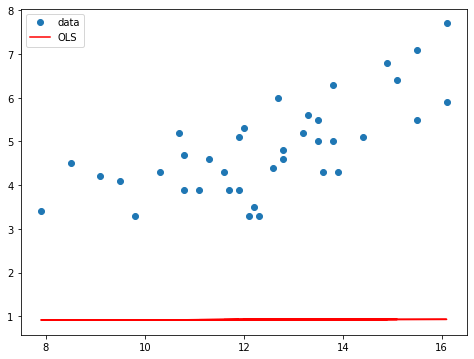

In [148]:
# Create model for Quality vs Clarity
model1 = ols('Clarity ~ Quality',data=wine).fit()
# View model summary
print(model1.summary())
# Plot model
fig, ax = plot.subplots(figsize=(8, 6))
ax.plot(X, y, "o", label="data")
ax.plot(X, model1.fittedvalues, "r-", label="OLS")
ax.legend(loc="best")
plot.show()

                            OLS Regression Results                            
Dep. Variable:                  Aroma   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     36.04
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           6.87e-07
Time:                        14:38:00   Log-Likelihood:                -43.243
No. Observations:                  38   AIC:                             90.49
Df Residuals:                      36   BIC:                             93.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1917      0.786      0.244      0.8

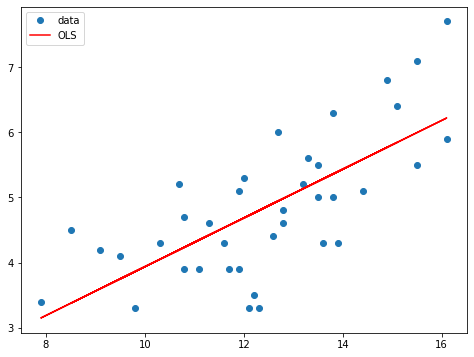

In [135]:
# Create model for Quality vs Aroma
model2 = ols('Aroma ~ Quality',data=wine).fit()
# View model summary
print(model2.summary())
# Plot model
fig, ax = plot.subplots(figsize=(8, 6))
ax.plot(X, y, "o", label="data")
ax.plot(X, model2.fittedvalues, "r-", label="OLS")
ax.legend(loc="best")
plot.show()

                            OLS Regression Results                            
Dep. Variable:                   Body   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     15.51
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           0.000361
Time:                        12:16:15   Log-Likelihood:                -39.257
No. Observations:                  38   AIC:                             82.51
Df Residuals:                      36   BIC:                             85.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9346      0.707      2.735      0.0

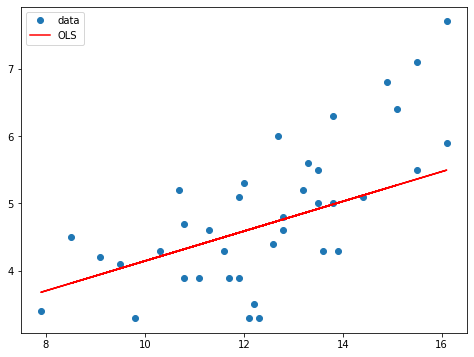

In [71]:
# Create model for Quality vs Body
model3 = ols('Body ~ Quality',data=wine).fit()
# View model summary
print(model3.summary())
# Plot model
fig, ax = plot.subplots(figsize=(8, 6))
ax.plot(X, y, "o", label="data")
ax.plot(X, model3.fittedvalues, "r-", label="OLS")
ax.legend(loc="best")
plot.show()

                            OLS Regression Results                            
Dep. Variable:                 Flavor   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     59.79
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           3.68e-09
Time:                        12:17:20   Log-Likelihood:                -35.869
No. Observations:                  38   AIC:                             75.74
Df Residuals:                      36   BIC:                             79.01
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1701      0.647     -0.263      0.7

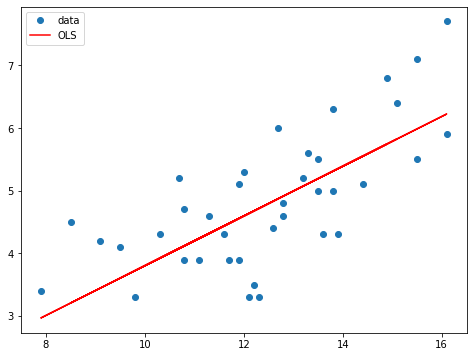

In [74]:
# Create model for Quality vs Flavor
model4 = ols('Flavor ~ Quality',data=wine).fit()
# View model summary
print(model4.summary())
# Plot model
fig, ax = plot.subplots(figsize=(8, 6))
ax.plot(X, y, "o", label="data")
ax.plot(X, model4.fittedvalues, "r-", label="OLS")
ax.legend(loc="best")
plot.show()

                            OLS Regression Results                            
Dep. Variable:               Oakiness   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                   0.07984
Date:                Mon, 20 Feb 2023   Prob (F-statistic):              0.779
Time:                        12:21:05   Log-Likelihood:                -41.828
No. Observations:                  38   AIC:                             87.66
Df Residuals:                      36   BIC:                             90.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4664      0.757      5.901      0.0

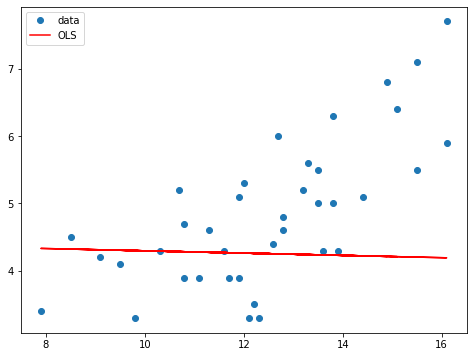

In [75]:
# Create model for Quality vs Oakiness
model5 = ols('Oakiness ~ Quality',data=wine).fit()
# View model summary
print(model5.summary())
# Plot model
fig, ax = plot.subplots(figsize=(8, 6))
ax.plot(X, y, "o", label="data")
ax.plot(X, model5.fittedvalues, "r-", label="OLS")
ax.legend(loc="best")
plot.show()
# Line does not go through middle of cluster

                            OLS Regression Results                            
Dep. Variable:                 Region   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     12.46
Date:                Mon, 20 Feb 2023   Prob (F-statistic):            0.00116
Time:                        12:22:07   Log-Likelihood:                -42.702
No. Observations:                  38   AIC:                             89.40
Df Residuals:                      36   BIC:                             92.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8300      0.774     -1.072      0.2

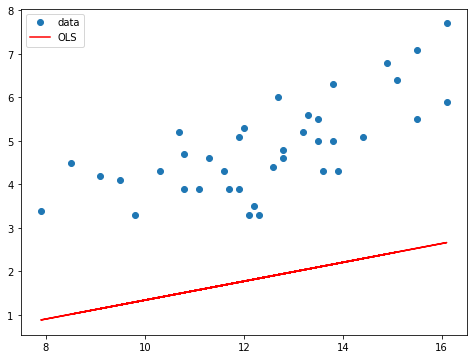

In [76]:
# Create model for Quality vs Region
model6 = ols('Region ~ Quality',data=wine).fit()
# View model summary
print(model6.summary())
# Plot model
fig, ax = plot.subplots(figsize=(8, 6))
ax.plot(X, y, "o", label="data")
ax.plot(X, model6.fittedvalues, "r-", label="OLS")
ax.legend(loc="best")
plot.show()
# Line does not go through middle of cluster

In [137]:
# Test significance of each variable
table = sm.stats.anova_lm(model1, typ=2)
print(table)
table = sm.stats.anova_lm(model2, typ=2)
print(table)
table = sm.stats.anova_lm(model3, typ=2)
print(table)
# Model 3 Statistically significant
table = sm.stats.anova_lm(model4, typ=2)
print(table)
# Model 4 Statistically significant
table = sm.stats.anova_lm(model5, typ=2)
print(table)
table = sm.stats.anova_lm(model6, typ=2)
print(table)

            sum_sq    df         F    PR(>F)
Quality   0.000460   1.0  0.029144  0.865402
Residual  0.568224  36.0       NaN       NaN
             sum_sq    df          F        PR(>F)
Quality   21.690709   1.0  36.044336  6.871033e-07
Residual  21.664028  36.0        NaN           NaN
            sum_sq    df         F    PR(>F)
Quality   0.024147   1.0  1.818513  0.186958
Aroma     0.009384   1.0  0.706737  0.406767
Body      0.081733   1.0  6.155296  0.018547
Flavor    0.010180   1.0  0.766626  0.387788
Oakiness  0.037770   1.0  2.844426  0.101418
Residual  0.424912  32.0       NaN       NaN
            sum_sq    df         F    PR(>F)
Quality   0.019430   1.0  1.265589  0.268712
Aroma     0.004393   1.0  0.286142  0.596290
Flavor    0.042163   1.0  2.746271  0.106960
Oakiness  0.032296   1.0  2.103562  0.156396
Residual  0.506645  33.0       NaN       NaN
             sum_sq    df         F    PR(>F)
Quality    0.044597   1.0  0.079838  0.779136
Residual  20.109351  36.0       NaN

In [158]:
# Fit multiple linear regression of Clarity on Quality
model12 = ols('Quality ~ Clarity + Aroma + Body + Flavor + Oakiness + Region',data=wine).fit()
print(model12.summary())
# Reject hypothesis for Region, Body, Clarity

                            OLS Regression Results                            
Dep. Variable:                Quality   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     13.33
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           2.04e-07
Time:                        14:53:22   Log-Likelihood:                -56.370
No. Observations:                  38   AIC:                             126.7
Df Residuals:                      31   BIC:                             138.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9843      2.270      1.755      0.0

In [139]:
# Test each variables interaction with Region
model7= ols('Region ~ Quality + Clarity + Quality:Clarity',data=wine).fit()
print(model7.summary())
print(sm.stats.anova_lm(model6, model7, typ=1))

model8 = ols('Region ~ Quality + Aroma + Quality:Aroma',data=wine).fit()
print(model8.summary())
print(sm.stats.anova_lm(model6, model8, typ=1))

model9 = ols('Region ~ Quality + Body + Quality:Body',data=wine).fit()
print(model9.summary())
print(sm.stats.anova_lm(model6, model9, typ=1))

model10 = ols('Region ~ Quality + Flavor + Quality:Flavor',data=wine).fit()
print(model10.summary())
print(sm.stats.anova_lm(model6, model10, typ=1))

model11 = ols('Region ~ Quality + Oakiness + Quality:Oakiness',data=wine).fit()
print(model11.summary())
print(sm.stats.anova_lm(model6, model11, typ=1))

                            OLS Regression Results                            
Dep. Variable:                 Region   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     4.084
Date:                Mon, 20 Feb 2023   Prob (F-statistic):             0.0140
Time:                        14:38:27   Log-Likelihood:                -42.501
No. Observations:                  38   AIC:                             93.00
Df Residuals:                      34   BIC:                             99.55
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.8288      6.346     

   df_resid        ssr  df_diff   ss_diff         F    Pr(>F)
0      36.0  21.055390      0.0       NaN       NaN       NaN
1      34.0  20.666561      2.0  0.388828  0.319844  0.728423


In [165]:
# Best model
# Drop Clarity, Body, and Region
model13 = ols('Quality ~ Aroma + Flavor + Oakiness',data=wine).fit()
print(model13.summary())

                            OLS Regression Results                            
Dep. Variable:                Quality   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     26.92
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           4.20e-09
Time:                        15:01:38   Log-Likelihood:                -57.489
No. Observations:                  38   AIC:                             123.0
Df Residuals:                      34   BIC:                             129.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4672      1.333      4.852      0.0